Summary of Results:

The average number of people on commercial planes was  36 and the average number of fatalities was 25.
Therefore the chance of survival on plane crashes with 1 or more more fatalities is 31.6 percent.
The number of commercial plane crashes with one fatality or more is 1078.

The most common areas for aircraft failure are:
Hawaii with 6 incidents, Alaska with 5 incidents and Arizona with 2 incidents.

See chart of Number of Accidents Per Year. 

In [1]:
# Starting plane crash jupyter notebook and 
# import dependences

import pandas as pd
import numpy as np
import csv
pd.set_option('display.max_colwidth', None)


In [2]:
# start with reading csv file
plane =  pd.read_csv("Airplane_Crashes.csv")

plane

plane[plane['DATE'].str.contains('2020')]

,DATE,TIME,LOCATION,OPERATOR,FLIGHT#,ROUTE,AIRCRAFT_TYPE,AIRCRAFT_REG,CN_LN,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
4972,01/02/2020,NaN,"Geneina, Sudan",Military - Sudanese Air Force,NaN,NaN,Antonov An12-A,NaN,NaN,18.0,9.0,9.0,18.0,9.0,9.0,0.0,"The aircraft crashed shortly after taking off from the airport, killing alll 18 occupants, including three children. The aircraft was returning to Khartoum after delivering medical aid."
4973,01/08/2020,NaN,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,UR-PSR,38124/5977,176.0,167.0,9.0,176.0,167.0,9.0,0.0,"The plane took off from Tehran International Airport at 06:11. After reaching 20 km from the airport and at an altitude of 7,900 ft. the plane suddenly crashed to the ground. The aircraft disintegrated leaving a 300 m long path of wreckage. The plane was accidentally shot down by a surface-to-air missile by the Iranian military suspecting it was a USA attack."
4974,02/05/2020,NaN,"Istanbul, Turkey",Pegasus Airlines,PC2193,Izmir - Istanbul,Boeing 737-86J,TC-IZK,37742,183.0,177.0,6.0,183.0,177.0,6.0,0.0,"While landing duriing high winds and heavey rain on runway 06, the plane suffered a runway excursion. The aircraft overran the runway, went down an embankment and impacted the airport perimeter wall breaking in three. The aircraft came to rest about 20 m below the runway elevation. The last recorded ground speed was 74 mph as the aircraft crossed the perimeter stop way."


In [3]:
contain_date = plane[plane['DATE'].str.contains('1991')]
contain_date.head()


,DATE,TIME,LOCATION,OPERATOR,FLIGHT#,ROUTE,AIRCRAFT_TYPE,AIRCRAFT_REG,CN_LN,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
3660,01/10/1991,18:00,"Near Paramo Mucuti, Venezuela",Military - Venezuelan Navy,NaN,Caracas - Merida,CASA 212 Aviocar 200,ARV-0209,264,22.0,19.0,3.0,21.0,18.0,3.0,0.0,"Crashed into Paramo Mucuti Mountain, 35 miles from it's destination of Merida. The last message from the pilot was he was unable to land because of adverse weather conditions and was declaring an emergency. The flight was transporting a funeral party for a Navy flyer killed a few days before. The only survivor was another Navy flyer who had also survived the earlier accident."
3661,01/30/1991,13:00,"Jalaludin, Indonesia",Merpati Nusantara Airlines,NaN,Manado - Gorontalo,CASA 212 Aviocar 200,PK-NCY,258/78N,21.0,18.0,3.0,1.0,1.0,0.0,0.0,The plane made a forced landing during poor weather conditions and crashed into trees on a ridge. All passengers survived but one elderly passenger died while waiting for rescue.
3662,01/31/1991,NaN,"Near Ras Al Khafji, Saudi Arabia",Military - U.S. Air Force,NaN,NaN,Lockheed AC-130H Hercules,69-6567,4341,14.0,0.0,14.0,14.0,0.0,14.0,0.0,Shot down by a surface-to-air missile during operation Desert Storm.
3663,02/01/1991,18:07,"LAX, Los Angeles, California",USAir / Skywest Airlines,1493/5569,Columbus - Los Angeles \ Los Angeles - Fresno,Boeing B-737-300 / Swearingen SA-227AC,N388US/N683AV,23310/1145 / AC-683,101.0,93.0,8.0,34.0,30.0,4.0,0.0,"The Skywest Metroliner was told to taxi into position for takeoff and hold. The ATC became preoccupied with another aircraft that departed the tower frequency. A Wings West aircraft reporting ""ready for takeoff"", caused some confusion because the controller didn't have a flight progress strip in front of her. The strip appeared to have been misfiled at the clearance delivery position. The USAir, which was cleared to land, struck the rear of the Metroliner. After the collision, both planes slid off the runway into an unoccupied fire station and burst into flames.The failure of the Los Angeles Air Traffic facility management to implement procedures that provided redundancy comparable to the requirements contained in the National Operational Position Standards and the failure of the FAA ATS to provide adequate policy direction and oversight to its ATC facility managers. These failures created an environment in the Los Angeles ATC tower that ultimately led to the failure of the controller to maintain awareness of the traffic situation, culminating in the inappropriate clearances and the subsequent collision of the USAir and SkyWest aircraft. Twenty-two killed aboard the USAir and all 12 aboard the Metroliner. One additional person died 31 days after the accident making it 35 killed."
3664,02/05/1991,12:51,"Near Nea Ankhialos, Greece",Military - Hellenic Air Force,NaN,Elefsis AB - Volos-Néa Anchialos,Lockheed C-130H,748,4724,63.0,59.0,4.0,63.0,59.0,4.0,0.0,"The aircraft flew into the summit of Mt. .Othrys at 4,000 ft. while preparing to land at Nea Anghialos Airport."


In [4]:
plane.dtypes

DATE                     object
TIME                     object
LOCATION                 object
OPERATOR                 object
FLIGHT#                  object
ROUTE                    object
AIRCRAFT_TYPE            object
AIRCRAFT_REG             object
CN_LN                    object
TOTAL_ONBOARD           float64
PASSENGER_ONBOARD       float64
CREW_ONBOARD            float64
TOTAL_FATALITIES        float64
PASSENGER_FATALITIES    float64
CREW_FATALITIES         float64
GROUND_CASUALTIES       float64
SUMMARY_OF_EVENTS        object
dtype: object

In [5]:
# Remove unnecessary columns
del plane["AIRCRAFT_REG"]
del plane["CN_LN"]
del plane["FLIGHT#"]
plane

,DATE,TIME,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army Air Forces,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge, 26, who was a passenger. This was the first recorded airplane fatality in history. One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft. Orville Wright suffered broken ribs, pelvis and a leg. Selfridge suffered a crushed skull and died a short time later."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0,"Eugene Lefebvre was the first pilot to ever be killed in an air accident, after his controls jambed while flying in an air show."
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0,"First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight."
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0,"The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed."
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,11/24/2019,NaN,"Goma, Democratic Republic of Congo",Busy Bee Congo,NaN,Dornier 228-201,19.0,17.0,2.0,19.0,17.0,2.0,10.0,"The passenger plane crashed about a minute after taking off from Goma Airport into the Mapendo neighborhood,"
4971,12/27/2019,07:22,"Almaty, Kazakhstan",Bek Air,Almaty - Nursultan Nazabavev,Fokker 100,98.0,95.0,3.0,13.0,NaN,NaN,7.0,"While taking off, the tail of the plane struck the runway twice, the aircraft lost altitude, went through a perimeter fence and crashed into a two-story building 700 meters from the end of the runway. There was no fire."
4972,01/02/2020,NaN,"Geneina, Sudan",Military - Sudanese Air Force,NaN,Antonov An12-A,18.0,9.0,9.0,18.0,9.0,9.0,0.0,"The aircraft crashed shortly after taking off from the airport, killing alll 18 occupants, including three children. The aircraft was returning to Khartoum after delivering medical aid."
4973,01/08/2020,NaN,"Near Shahriah, Iran",Ukraine International Airlines,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176.0,167.0,9.0,0.0,"The plane took off from Tehran International Airport at 06:11. After reaching 20 km from the airport and at an altitude of 7,900 ft. the plane suddenly crashed to the ground. The aircraft disintegrated leaving a 300 m long path of wreckage. The plane was accidentally shot down by a surface-to-air missile by the Iranian military suspecting it was a USA attack."


In [6]:
# need to drop dates before 1991 but can't using current format---using datetime
plane["DATE"]= pd.to_datetime(plane["DATE"])

# '01/10/1991' tenth of Jan ----checked 1991 data 
start_date = '1991-01-10'

# end_date = '02/05/2020' Don't need an end date
plane_1991_2021 = plane[(plane['DATE'] >= start_date)]

plane_1991_2021



,DATE,TIME,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
3660,1991-01-10,18:00,"Near Paramo Mucuti, Venezuela",Military - Venezuelan Navy,Caracas - Merida,CASA 212 Aviocar 200,22.0,19.0,3.0,21.0,18.0,3.0,0.0,"Crashed into Paramo Mucuti Mountain, 35 miles from it's destination of Merida. The last message from the pilot was he was unable to land because of adverse weather conditions and was declaring an emergency. The flight was transporting a funeral party for a Navy flyer killed a few days before. The only survivor was another Navy flyer who had also survived the earlier accident."
3661,1991-01-30,13:00,"Jalaludin, Indonesia",Merpati Nusantara Airlines,Manado - Gorontalo,CASA 212 Aviocar 200,21.0,18.0,3.0,1.0,1.0,0.0,0.0,The plane made a forced landing during poor weather conditions and crashed into trees on a ridge. All passengers survived but one elderly passenger died while waiting for rescue.
3662,1991-01-31,NaN,"Near Ras Al Khafji, Saudi Arabia",Military - U.S. Air Force,NaN,Lockheed AC-130H Hercules,14.0,0.0,14.0,14.0,0.0,14.0,0.0,Shot down by a surface-to-air missile during operation Desert Storm.
3663,1991-02-01,18:07,"LAX, Los Angeles, California",USAir / Skywest Airlines,Columbus - Los Angeles \ Los Angeles - Fresno,Boeing B-737-300 / Swearingen SA-227AC,101.0,93.0,8.0,34.0,30.0,4.0,0.0,"The Skywest Metroliner was told to taxi into position for takeoff and hold. The ATC became preoccupied with another aircraft that departed the tower frequency. A Wings West aircraft reporting ""ready for takeoff"", caused some confusion because the controller didn't have a flight progress strip in front of her. The strip appeared to have been misfiled at the clearance delivery position. The USAir, which was cleared to land, struck the rear of the Metroliner. After the collision, both planes slid off the runway into an unoccupied fire station and burst into flames.The failure of the Los Angeles Air Traffic facility management to implement procedures that provided redundancy comparable to the requirements contained in the National Operational Position Standards and the failure of the FAA ATS to provide adequate policy direction and oversight to its ATC facility managers. These failures created an environment in the Los Angeles ATC tower that ultimately led to the failure of the controller to maintain awareness of the traffic situation, culminating in the inappropriate clearances and the subsequent collision of the USAir and SkyWest aircraft. Twenty-two killed aboard the USAir and all 12 aboard the Metroliner. One additional person died 31 days after the accident making it 35 killed."
3664,1991-02-05,12:51,"Near Nea Ankhialos, Greece",Military - Hellenic Air Force,Elefsis AB - Volos-Néa Anchialos,Lockheed C-130H,63.0,59.0,4.0,63.0,59.0,4.0,0.0,"The aircraft flew into the summit of Mt. .Othrys at 4,000 ft. while preparing to land at Nea Anghialos Airport."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,2019-11-24,NaN,"Goma, Democratic Republic of Congo",Busy Bee Congo,NaN,Dornier 228-201,19.0,17.0,2.0,19.0,17.0,2.0,10.0,"The passenger plane crashed about a minute after taking off from Goma Airport into the Mapendo neighborhood,"
4971,2019-12-27,07:22,"Almaty, Kazakhstan",Bek Air,Almaty - Nursultan Nazabavev,Fokker 100,98.0,95.0,3.0,13.0,NaN,NaN,7.0,"While taking off, the tail of the plane struck the runway twice, the aircraft lost altitude, went through a perimeter fence and crashed into a two-story building 700 meters from the end of the runway. There was no fire."
4972,2020-01-02,NaN,"Geneina, Sudan",Military - Sudanese Air Force,NaN,Antonov An12-A,18.0,9.0,9.0,18.0,9.0,9.0,0.0,"The aircraft crashed shortly after taking off from the airport, killing alll 18 occupants, including three children. The aircraft was returning to Khartoum after delivering medical aid."
4973,2020-01-08,NaN,"Near Shahr

In [7]:
# check for Boeing aircraft manufacturer

# Boeing = plane[plane['AIRCRAFT_TYPE'].str.contains('Boeing')]

plane_1991_2021['AIRCRAFT_TYPE'].str.contains('Boeing')

3660    False
3661    False
3662    False
3663     True
3664    False
        ...  
4970    False
4971    False
4972    False
4973     True
4974     True
Name: AIRCRAFT_TYPE, Length: 1315, dtype: object

In [ ]:
# Lets take a look at the data in the Military and analise it separately.
military = plane_1991_2021[plane_1991_2021['OPERATOR'].str.contains('Military')]
military.head()



In [9]:
# method to drop strings with military
non_military = plane_1991_2021[plane_1991_2021['OPERATOR'].str.contains('Military')==False]
non_military


,DATE,TIME,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
3661,1991-01-30,13:00,"Jalaludin, Indonesia",Merpati Nusantara Airlines,Manado - Gorontalo,CASA 212 Aviocar 200,21.0,18.0,3.0,1.0,1.0,0.0,0.0,The plane made a forced landing during poor weather conditions and crashed into trees on a ridge. All passengers survived but one elderly passenger died while waiting for rescue.
3663,1991-02-01,18:07,"LAX, Los Angeles, California",USAir / Skywest Airlines,Columbus - Los Angeles \ Los Angeles - Fresno,Boeing B-737-300 / Swearingen SA-227AC,101.0,93.0,8.0,34.0,30.0,4.0,0.0,"The Skywest Metroliner was told to taxi into position for takeoff and hold. The ATC became preoccupied with another aircraft that departed the tower frequency. A Wings West aircraft reporting ""ready for takeoff"", caused some confusion because the controller didn't have a flight progress strip in front of her. The strip appeared to have been misfiled at the clearance delivery position. The USAir, which was cleared to land, struck the rear of the Metroliner. After the collision, both planes slid off the runway into an unoccupied fire station and burst into flames.The failure of the Los Angeles Air Traffic facility management to implement procedures that provided redundancy comparable to the requirements contained in the National Operational Position Standards and the failure of the FAA ATS to provide adequate policy direction and oversight to its ATC facility managers. These failures created an environment in the Los Angeles ATC tower that ultimately led to the failure of the controller to maintain awareness of the traffic situation, culminating in the inappropriate clearances and the subsequent collision of the USAir and SkyWest aircraft. Twenty-two killed aboard the USAir and all 12 aboard the Metroliner. One additional person died 31 days after the accident making it 35 killed."
3666,1991-02-17,00:20,"Cleveland, Ohio",Ryan International Airlines,Cleveland - Indianapolis,McDonnell Douglas DC-9-15RC,2.0,0.0,2.0,2.0,0.0,2.0,0.0,"The cargo plane stalled during takeoff cart wheeled and crashed. The failure of the flight crew to detect and remove ice contamination on the airplane's wings, which was largely a result of a lack of appropriate response by the Federal Aviation Administration, Douglas Aircraft Company, and Ryan International Airlines to the known effect that a minute amount of contamination has on the stall characteristics of the DC-9 series 10 airplane. The ice contamination led to wing stall and loss of control during the attempted takeoff."
3667,1991-02-20,15:24,"Puerto Williams, Chile",LAN,Punta Arenas - Puerto Williams,British Aerospace BAE-146-200A,72.0,65.0,7.0,20.0,20.0,0.0,0.0,The plane overran the runway on approach and sank in Beagle Channel in the sea.
3669,1991-03-03,09:44,"Near Colorado Springs, Colorado",United Air Lines,Denver - Colorado Springs,Boeing B-737-291,25.0,20.0,5.0,25.0,20.0,5.0,0.0,"While on final approach to Colorado Springs, the aircraft suddenly rolled to the right and pitched nose down until it reached an almost vertical attitude before hitting the ground. Uncommanded deflection of the rudder caused by the jamming of the main rudder PUC servo valve. The rudder malfunction forced the rudder to go in the opposite direction the pilots commanded it to go. First female pilot to die on the flight deck of a major U.S. airline."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,2019-10-04,NaN,"Lviv, Ukraine",Ukraine Air Alliance,Spain – Turkey,Antonov An-12BK,8.0,1.0,7.0,5.0,1.0,4.0,0.0,"The chartered cargo plane, planning to stop for refueling at Lviv, and continue on to Istanbul, ran out of fuel and crashed less than a mile from the runway into brush."
4970,2019-11-24,NaN,"Goma, Democratic Republic of Congo",Busy Bee Congo,NaN,Dornier 228-201,19.0,17.0,2.0,19.0,17.0,2.0,10.0,"The passenger 

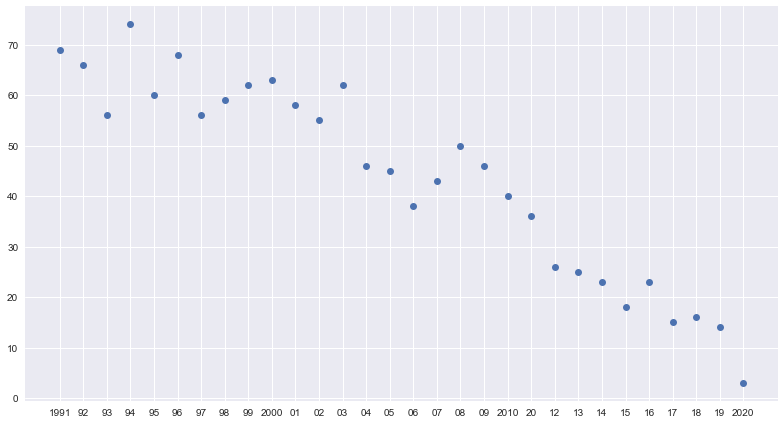

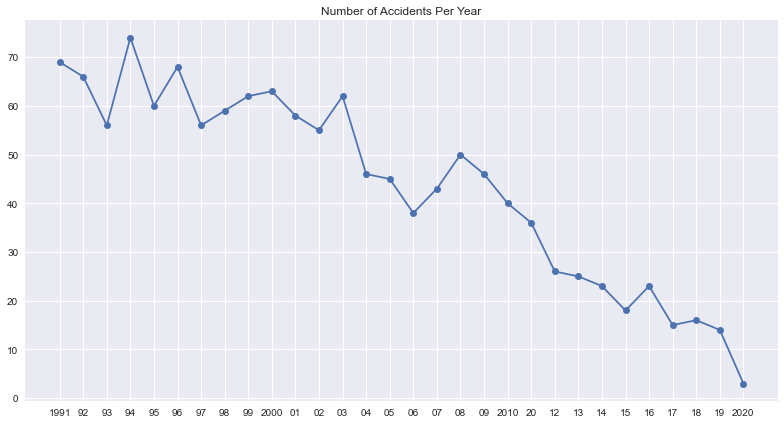

In [10]:
# 1. Is transport becoming safer?    
# 1. Graph the total number of crashes per year with respect to time to see if the industry has become safer for commercial travel
import pandas as pd
import matplotlib.pyplot as plt

date_time = non_military["DATE"]
date_time = pd.to_datetime(date_time)
                                               # plane[plane['DATE'].str.contains('1991')]
#note data only reaches mid 2020
# creating bins for each year to plot ----takes up so much time
start_date ='1991-01-10'
year92 = '1992-01-01'
year93 = '1993-01-01'
year94 = "1994-01-01"
year95 = "1995-01-01"
year96 = "1996-01-01"
year97 = "1997-01-01"
year98 = "1998-01-01"
year99 = "1999-01-01"
year00 = "2000-01-01"
year01 = "2001-01-01"
year02 = "2002-01-01"
year03 = "2003-01-01"
year04 = "2004-01-01"
year05 = "2005-01-01"
year06 = "2006-01-01"
year07 = "2007-01-01"
year08 = "2008-01-01"
year09 = "2009-01-01"
year10 = "2010-01-01"
year11 = "2011-01-01"
year12 = "2012-01-01"
year13 = "2013-01-01"
year14 = "2014-01-01"
year15 = "2015-01-01"
year16 = "2016-01-01"
year17 = "2017-01-01"
year18 = "2018-01-01"
year19 = "2019-01-01"
year20 = "2020-01-01"
year21 = "2021-01-01"    # Data stops in Mid 2020
years91_92 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= start_date) & (plane_1991_2021['DATE'] < year92)])
years92_93 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year92) & (plane_1991_2021['DATE'] < year93)])
years93_94 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year93) & (plane_1991_2021['DATE'] < year94)])
years94_95 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year94) & (plane_1991_2021['DATE'] < year95)])
years95_96 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year95) & (plane_1991_2021['DATE'] < year96)])
years96_97 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year96) & (plane_1991_2021['DATE'] < year97)])
years97_98 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year97) & (plane_1991_2021['DATE'] < year98)])
years98_99 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year98) & (plane_1991_2021['DATE'] < year99)])
years99_00 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year99) & (plane_1991_2021['DATE'] < year00)])
years00_01 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year00) & (plane_1991_2021['DATE'] < year01)])
years01_02 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year01) & (plane_1991_2021['DATE'] < year02)])
years02_03 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year02) & (plane_1991_2021['DATE'] < year03)])
years03_04 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year03) & (plane_1991_2021['DATE'] < year04)])
years04_05 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year04) & (plane_1991_2021['DATE'] < year05)])
years05_06 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year05) & (plane_1991_2021['DATE'] < year06)])
years06_07 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year06) & (plane_1991_2021['DATE'] < year07)])
years07_08 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year07) & (plane_1991_2021['DATE'] < year08)])
years08_09 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year08) & (plane_1991_2021['DATE'] < year09)])
years09_10 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year09) & (plane_1991_2021['DATE'] < year10)])
years10_11 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year10) & (plane_1991_2021['DATE'] < year11)])

years11_12 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year11) & (plane_1991_2021['DATE'] < year12)])
years12_13 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year12) & (plane_1991_2021['DATE'] < year13)])
years13_14 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year13) & (plane_1991_2021['DATE'] < year14)])
years14_15 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year14) & (plane_1991_2021['DATE'] < year15)])
years15_16 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year15) & (plane_1991_2021['DATE'] < year16)]) 
years16_17 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year16) & (plane_1991_2021['DATE'] < year17)])
years17_18 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year17) & (plane_1991_2021['DATE'] < year18)])
years18_19 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year18) & (plane_1991_2021['DATE'] < year19)]) 
years19_20 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year19) & (plane_1991_2021['DATE'] < year20)])
years20_21 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year20) & (plane_1991_2021['DATE'] < year21)])




import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.style.use('seaborn')

dates = ["1991","92","93","94","95",'96',"97","98","99", "2000", 
        "01", "02", "03", "04", "05", "06", "07", "08", "09", "2010", 
        "20", "12","13", "14", "15", "16", "17", "18", "19", "2020"]

y = [years91_92, years92_93, years93_94, years94_95, years95_96, years96_97, years97_98, years98_99 ,
    years99_00, years00_01, years01_02, years02_03, years03_04, years04_05, years05_06, years06_07, 
    years07_08, years08_09, years09_10,years10_11, years11_12, years12_13, years13_14, 
    years14_15, years15_16, years16_17, years17_18, years18_19, years19_20, years20_21]
plt.rcParams["figure.figsize"] = [11, 6]
plt.rcParams["figure.autolayout"] = True
plt.plot_date(dates, y)
plt.tight_layout()
plt.show()
plt.title("Number of Accidents Per Year")

plt.plot_date(dates, y, linestyle ='solid')


In [ ]:
plane_1991_2021[plane_1991_2021["TOTAL_FATALITIES"] ==0].head()

In [ ]:
# 2.  What vehicles are you most likely to survive if there is one fatality or more?

fatlaities_abovezero = non_military[non_military['TOTAL_FATALITIES'] >= 1 ]
fatlaities_abovezero


In [ ]:
# find the number of plane crashes with one fatality or more
plane_num = len(fatlaities_abovezero)
plane_num
print(f"The number of plane crashes with one fatality or more is {plane_num}")

In [14]:
# lets look at the chance of surviving a plane crash with 1 or more fatality

mean_death = fatlaities_abovezero["TOTAL_FATALITIES"].mean()
mean_total_onboard = fatlaities_abovezero["TOTAL_ONBOARD"].mean()
mean_death, mean_total_onboard

percent_survive= round((100*(1 -mean_death/mean_total_onboard)), 1)

# {:.0%}----format for % ?
print(f"The average number of people on commerical planes was  {round(mean_total_onboard)} \n and the average number of fatalities was: {round(mean_death)}.")
print(f" Therefore the chance of survival on plane crashes with 1 more more fatalities is {percent_survive} percent")



The average number of people on commerical planes was  36 
 and the average number of fatalities was: 25.
 Therefore the chance of survival on plane crashes with 1 more more fatalities is 31.6 percent


In [35]:
#lets take a look at the total number of plane types to get an indication of the worst planes
plane_1991_2021["AIRCRAFT_TYPE"].value_counts()




De Havilland Canada DHC-6 Twin Otter 300    43
Antonov AN-26                               19
Yakovlev YAK-40                             14
Let 410UVP                                  11
Douglas DC-3C                                9
                                            ..
Boeing B-737-204C                            1
Hawker Siddeley HS-748-501 Super 2B          1
Boeing 757-204                               1
Dassault Falcon 900B                         1
Boeing 737-86J                               1
Name: AIRCRAFT_TYPE, Length: 863, dtype: int64

In [ ]:
De_Havillandplane= plane_1991_2021[(plane_1991_2021["AIRCRAFT_TYPE"]=="De Havilland Canada DHC-6 Twin Otter 300")]
De_Havillandplane.SUMMARY_OF_EVENTS

In [16]:

#description of worst plane flight reasons
worst_planes = plane_1991_2021[(plane_1991_2021["AIRCRAFT_TYPE"]=="De Havilland Canada DHC-6 Twin Otter 300") | (plane_1991_2021["AIRCRAFT_TYPE"]=="Antonov AN-26") | (plane_1991_2021["AIRCRAFT_TYPE"]=="Yakovlev YAK-40")]
worst_planes.SUMMARY_OF_EVENTS

3665                                                                                                                               Crashed into the side of Mt. Paso Macunaa at 5,000 ft. in a jungle region of eastern Ecuador in poor weather. Controlled flight into terrain.
3668                                                                                                                                                                                                                Shot down by surface-to-air missile launced by UNITA rebels.
3692                                                                                                                                                                         While attempting to land the pilot continued VFR flight in IFR conditions and collided with a hill.
3709                                                                                                                                                                                 

In [17]:
lotof_failure_count = non_military["AIRCRAFT_TYPE"].value_counts()

#Find the top ten aircraft types with the largest number of failures
top10 = lotof_failure_count.nlargest(n=10)
top10

# ---------Make a bar chart with the name of airplanes and find pictures of the aircraft for presentation-------------





De Havilland Canada DHC-6 Twin Otter 300    39
Yakovlev YAK-40                             13
Antonov AN-26                               12
Let 410UVP                                  10
Douglas DC-3C                                9
Fokker F-27 Friendship 600                   9
McDonnell Douglas MD-82                      8
Embraer 110P1 Bandeirante                    8
Fokker 100                                   7
Let 410UVP-E                                 7
Name: AIRCRAFT_TYPE, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'De Havilland Canada DHC-6'),
  Text(1, 0, 'Yakovlev YAK-40'),
  Text(2, 0, 'Antonov AN-26'),
  Text(3, 0, 'Let 410UVP'),
  Text(4, 0, 'Douglas DC-3C'),
  Text(5, 0, 'Fokker F-27 Friendship 600'),
  Text(6, 0, 'McDonnell Douglas MD-82'),
  Text(7, 0, 'Embraer 110P1 Bandeirante'),
  Text(8, 0, 'Fokker 100'),
  Text(9, 0, 'Let 410UVP-E')])

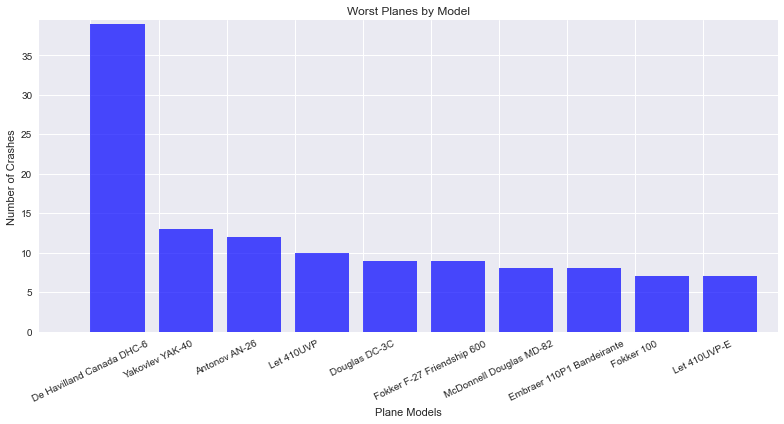

In [76]:
worst10 = ["De Havilland Canada DHC-6", "Yakovlev YAK-40", "Antonov AN-26", "Let 410UVP", "Douglas DC-3C","Fokker F-27 Friendship 600", "McDonnell Douglas MD-82", "Embraer 110P1 Bandeirante", "Fokker 100", "Let 410UVP-E"]

data_10worstplanes = [39,13,12,10,9,9,8,8,7,7]
x_axis = np.arange(len(data_10worstplanes))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, worst10, rotation=30)
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis -10)+0.1)
plt.ylim(0, max(data_10worstplanes)+0.4)
# Create a bar chart based upon the above data
plt.bar(x_axis,data_10worstplanes, color="b", align="edge",  alpha=0.7)
spacing = 1
# Give the chart a title, x label, and y label
plt.title("Worst Planes by Model")
plt.xlabel("Plane Models")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=26, horizontalalignment="center")


In [18]:
# What were the most dangerous routes?  ROUTE
route_count = non_military["ROUTE"].value_counts()
route_count.nlargest(n=5)




Sightseeing             19
Training                10
Villavicencio - Mitu     4
Huambo - Luanda          3
Lagos - Abuja            3
Name: ROUTE, dtype: int64

In [19]:
training  = non_military[non_military['ROUTE']=="Villavicencio - Mitu"]["LOCATION"]
training.value_counts()


Villavicencio, Colombia    2
Bogota, Colombia           1
Mitu, Colombia             1
Name: LOCATION, dtype: int64

In [20]:
sr  = non_military[non_military['ROUTE']=="Sightseeing"]["LOCATION"]
sr

3770                                Hana, Hawaii
3890                              Kodiak, Alaska
4131                       Mt. Waialeale, Hawaii
4192                              Juneau, Alaska
4428                             Volcano, Hawaii
4440                     Waialeale,Kauai, Hawaii
4450                      Near Meadview, Arizona
4602                         Princeville, Hawaii
4623                         Rudyerd Bay, Alaska
4624                              Moscow, Russia
4626                      Near Ketchikan, Alaska
4804                       Near Kathmandu, Nepal
4808              Near Kilohana, Molokai, Hawaii
4810                      Near Henderson, Nevada
4890                           Ella Lake, Alaska
4902      Fox Glacier, South Valley, New Zealand
4912                Near Pigeon Forge, Tennessee
4943                       Grand Canyon, Arizona
4947                          New York, New York
Name: LOCATION, dtype: object

In [21]:
Hawaii = sr[sr.str.contains(", Hawaii")].count()
Alaska = sr[sr.str.contains(", Alaska")].count()
Arizona = sr[sr.str.contains(", Arizona")].count()
print(f"The most common areas for aircraft failure are:\n Hawaii with {Hawaii} incidents\n Alaska with {Alaska} incidents\n and Arizona with {Arizona} incidents\n") 



The most common areas for aircraft failure are:
 Hawaii with 6 incidents
 Alaska with 5 incidents
 and Arizona with 2 incidents



In [22]:
# What contributed to fatal accidents?
# Looked at the three categories environmental/weather, mechanical/plane issues, human error/communications/pilot choices

# Used str.contains("word") to find the reasons for crashes

# --------------------------------------MAKE A PIE CHART OR BAR CHART OF THESE STATISTICS -----------------------------------------
  
# -------------------------------Weather-------------------------------------
# poor weather - 58 instances
non_military["SUMMARY_OF_EVENTS"].str.contains("poor weather").value_counts() 
# weather contributed 141 times
non_military["SUMMARY_OF_EVENTS"].str.contains("weather").value_counts()
# fog contributed 74 times
non_military["SUMMARY_OF_EVENTS"].str.contains("fog").value_counts()

# ice contributed 98 times
non_military["SUMMARY_OF_EVENTS"].str.contains("ice").value_counts()

# ------------------------------Mechanical/plane damage issues------------------------
# stalled - 47 instances
non_military["SUMMARY_OF_EVENTS"].str.contains("stalled").value_counts()
# rudder  - 9 instances
non_military["SUMMARY_OF_EVENTS"].str.contains("rudder").value_counts()

#aircraft suddenly... - 5 instances
non_military["SUMMARY_OF_EVENTS"].str.contains("aircraft suddenly").value_counts()

# wing - 97 instances 
non_military["SUMMARY_OF_EVENTS"].str.contains("wing").value_counts()
# --------------------------------------------------------------------------------

# ran off runwa/ runway excursion only 1 instance
non_military["SUMMARY_OF_EVENTS"].str.contains("runway excursion").value_counts()

# -----------------Human error communications issues --------------------------
# Pilot 330 instances
non_military["SUMMARY_OF_EVENTS"].str.contains("pilot").value_counts()

#ATC--- Air Traffic control issues - 26 instances
non_military["SUMMARY_OF_EVENTS"].str.contains("ATC").value_counts()
# --------------------------------------------------------------------


# ----------------------resulted in ------------------------------------------
# Plane hit something.... - 26 instances
non_military["SUMMARY_OF_EVENTS"].str.contains("plane struck").value_counts()

# Issues during taking off - 8+13 instances 
non_military["SUMMARY_OF_EVENTS"].str.contains("While taking off").value_counts()
non_military["SUMMARY_OF_EVENTS"].str.contains("during takeoff").value_counts()

# Loss of control - 30 instances
non_military["SUMMARY_OF_EVENTS"].str.contains("loss of control").value_counts()

# Mentioned another aircraft---most likely collision- 5 instances
non_military["SUMMARY_OF_EVENTS"].str.contains("another aircraft").value_counts()

# overran the runway - 36 instances
non_military["SUMMARY_OF_EVENTS"].str.contains("overran the runway").value_counts()

# ---------------------------------------------------------------------------------

non_military["SUMMARY_OF_EVENTS"].str.contains("pilot").value_counts()


False    769
True     330
Name: SUMMARY_OF_EVENTS, dtype: int64

In [ ]:
non_military["SUMMARY_OF_EVENTS"].head()

In [ ]:

start_date2010 = '2010-01-01'
# end_date = '02/05/2020' Don't need an end date
plane_2010_2020 = plane[(plane['DATE'] >= start_date2010)]

non_military_2010 =plane_2010_2020[plane_2010_2020['OPERATOR'].str.contains('Military')==False]
non_military_2010


In [25]:
#group by state
#where did people die? ----see last ten years? 

# Give state and total deaths 2010-2020 excel file is fine.
non_military.LOCATION

# Restrict data to 2010-2020-----------------------------------------------------------------
start_date2010 = '2010-01-01'
# end_date = '02/05/2020' Don't need an end date
plane_2010_2020 = plane[(plane['DATE'] >= start_date2010)]

non_military_2010 =plane_2010_2020[plane_2010_2020['OPERATOR'].str.contains('Military')==False]

# ------------------------------------------Search states------------------------------------

state1_count = non_military_2010[non_military_2010['LOCATION'].str.contains('Alabama')== True]
len(state1_count)
state2_count = non_military_2010[non_military_2010['LOCATION'].str.contains('Alaska')== True]
len(state2_count)
state3_count = non_military_2010[non_military_2010['LOCATION'].str.contains('Arizona')== True]
len(state3_count)
state4_count = non_military_2010[non_military_2010['LOCATION'].str.contains('Arkansas')== True]
len(state4_count)


# copied list of states
# can I create a loop for the number of crashes in each state instead search liek above??
us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Washington DC', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

crashes_per_state = []
for state in us_states:
    crashes_per_state.append(len(non_military_2010[non_military_2010['LOCATION'].str.contains(state)== True]))

crashes_per_state

# dictionary of states and number of crashes 
#     example

# keys_list = ["a", "b"]
# values_list = [1, 2]
# zip_iterator = zip(keys_list, values_list)
# Get pairs of elements
# a_dictionary = dict(zip_iterator)

zip_iterator = zip(us_states, crashes_per_state)



state_crash_dictionary = dict(zip_iterator)
state_crash_dictionary

# sum(state_crash_dictionary.values())
state_crash_dictionary

# -----------------How do I count the number of deaths in each state?-----see next cell


{'Alabama': 1,
 'Alaska': 7,
 'Arizona': 1,
 'Arkansas': 0,
 'California': 1,
 'Colorado': 0,
 'Connecticut': 0,
 'Washington DC': 0,
 'Delaware': 0,
 'Florida': 1,
 'Georgia': 0,
 'Hawaii': 1,
 'Idaho': 0,
 'Illinois': 0,
 'Indiana': 0,
 'Iowa': 1,
 'Kansas': 0,
 'Kentucky': 0,
 'Louisiana': 0,
 'Maine': 0,
 'Maryland': 0,
 'Massachusetts': 0,
 'Michigan': 0,
 'Minnesota': 0,
 'Mississippi': 0,
 'Missouri': 1,
 'Montana': 0,
 'Nebraska': 0,
 'Nevada': 2,
 'New Hampshire': 0,
 'New Jersey': 0,
 'New Mexico': 0,
 'New York': 1,
 'North Carolina': 0,
 'North Dakota': 0,
 'Ohio': 1,
 'Oklahoma': 0,
 'Oregon': 0,
 'Pennsylvania': 1,
 'Rhode Island': 0,
 'South Carolina': 0,
 'South Dakota': 0,
 'Tennessee': 1,
 'Texas': 3,
 'Utah': 0,
 'Vermont': 0,
 'Virginia': 1,
 'Washington': 1,
 'West Virginia': 1,
 'Wisconsin': 0,
 'Wyoming': 0}

In [26]:
# -----------------How do I count the number of deaths in each state---------------------------------

# Check total fatalities in each of these crashes_per_state using non_military_2010['TOTAL_FATALITIES']
# Useing lowercase so that nothing is missed when I run through the states for each location
#  example str.lower().str.contains('iowa')


location_dict ={"LOCATION":[], "STATE": []}
for state,crashes in state_crash_dictionary.items():
    
    for location in non_military_2010["LOCATION"].unique():
        if state.lower() in location.lower():
            location_dict["LOCATION"].append(location)
            location_dict["STATE"].append(state)
print(location_dict)

len(location_dict)

location_map = pd.DataFrame(location_dict)


{'LOCATION': ['Birmingham, Alabama', 'Off Sand Point, Alaska', 'Near Denali National Park, Alaska', 'Near Dillingham, Alaska', 'Off Kaminshak Bay, Alaska', 'Ella Lake, Alaska', 'Iliamna East Wind Lake, Alaska', 'Grand Canyon, Arizona', 'San Francisco, California', 'Green Grove, Florida', 'Near\xa0Kilohana, Molokai, Hawaii', 'Near Clear Lake, Iowa', 'Mosby, Missouri', 'Reno, Nevada', 'Near Henderson, Nevada', 'New York, New York', 'Toledo, Ohio', 'NW of Philadelphia, Pennsylvania', 'Near Pigeon Forge, Tennessee', 'Wichita Falls, Texas', 'Near Lockhart, Texas', 'Houston, Texas', 'Charleston, West Virginia', 'Seattle, Washington', 'Charleston, West Virginia'], 'STATE': ['Alabama', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Arizona', 'California', 'Florida', 'Hawaii', 'Iowa', 'Missouri', 'Nevada', 'Nevada', 'New York', 'Ohio', 'Pennsylvania', 'Tennessee', 'Texas', 'Texas', 'Texas', 'Virginia', 'Washington', 'West Virginia']}


In [27]:
#total fatalities in each location
non_military_2010.groupby("LOCATION").sum()

# need TOTAL_FATALITIES in each state of USA 

,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES
LOCATION,,,,,,,
"\tRostov-on-Don, Russia",62.0,55.0,7.0,62.0,55.0,7.0,0.0
"\tTawang, India",23.0,0.0,0.0,18.0,0.0,0.0,0.0
"\tZhengchang, Suiyang County, Guizhou Province",12.0,7.0,5.0,12.0,7.0,5.0,0.0
"Fox Glacier, South Valley, New Zealand",7.0,6.0,1.0,7.0,6.0,1.0,0.0
"Near Mogadishu, Somalia",72.0,72.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
"Xiang Khouang province, Laos",17.0,11.0,6.0,16.0,10.0,6.0,0.0
"Yangadou, Cameroon",11.0,9.0,2.0,11.0,9.0,2.0,0.0
"Yaroslavl, Russia",45.0,37.0,8.0,44.0,37.0,7.0,0.0


In [28]:
location_condition = non_military_2010["LOCATION"].isin(location_map["LOCATION"].unique())

# non_military_2010.loc[location_condition]
# non_military_2010.loc[location_condition].count()

# area_death = non_military_2010.loc[location_condition].groupby("LOCATION").sum().reset_index()


merged = non_military_2010.loc[location_condition].merge(location_map, on = "LOCATION", how = "left")
merged.groupby("STATE").sum().reset_index()
# merged.to_csv("merged_us_accidents.csv")

merged2 = location_map.merge(non_military_2010.loc[location_condition], how ="left", on = "LOCATION")
total_fatalities = merged2.groupby("STATE").sum().reset_index()

# total_fatalities.to_csv("total_fatalities.csv")
total_fatalities


,STATE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES
0,Alabama,2.0,0.0,2.0,2.0,0.0,2.0,0.0
1,Alaska,36.0,25.0,11.0,28.0,18.0,10.0,0.0
2,Arizona,7.0,6.0,1.0,3.0,3.0,0.0,0.0
3,California,307.0,291.0,16.0,3.0,3.0,0.0,0.0
4,Florida,3.0,2.0,1.0,3.0,2.0,1.0,0.0
5,Hawaii,5.0,4.0,1.0,5.0,4.0,1.0,0.0
6,Iowa,3.0,2.0,1.0,3.0,2.0,1.0,0.0
7,Missouri,4.0,3.0,1.0,4.0,3.0,1.0,0.0
8,Nevada,6.0,4.0,2.0,6.0,4.0,2.0,10.0
9,New York,6.0,5.0,1.0,5.0,5.0,0.0,0.0
